# Análisis auxiliar de datos externos al dataset oficial

## Importacion de librerias
#### ********************************************************************************************

In [45]:
import geopandas as gpd

In [46]:
import pandas as pd

In [47]:
import matplotlib.pyplot as plt

### 1. Análisis de los barrios de Barcelona

<Axes: >

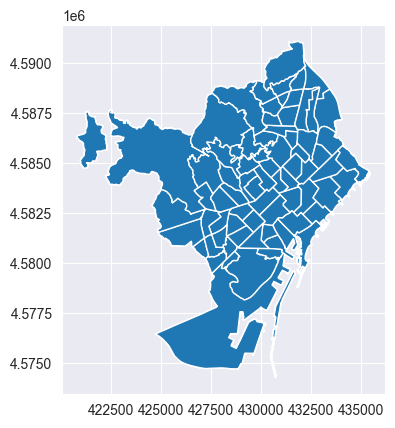

In [48]:
# Cargar el archivo geojson de los barrios de Barcelona
gdf = gpd.read_file('../auxiliares/0301100100_UNITATS_ADM_POLIGONS.json')

#plot
gdf.plot()

### 2. Análisis de la renta bruta por hogar

In [49]:
df_renta = gpd.read_file('../auxiliares/2021_atles_renda_bruta_llar.csv')

In [50]:
df_renta.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
0,2021,1,Ciutat Vella,1,el Raval,1,34839
1,2021,1,Ciutat Vella,1,el Raval,2,27777
2,2021,1,Ciutat Vella,1,el Raval,3,31082
3,2021,1,Ciutat Vella,1,el Raval,4,34635
4,2021,1,Ciutat Vella,1,el Raval,5,27950


In [51]:
df_renta.shape

(1068, 7)

In [52]:
df_renta.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Seccio_Censal', 'Import_Renda_Bruta_€'],
      dtype='object')

In [53]:
df_renta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   1068 non-null   object
 1   Codi_Districte        1068 non-null   object
 2   Nom_Districte         1068 non-null   object
 3   Codi_Barri            1068 non-null   object
 4   Nom_Barri             1068 non-null   object
 5   Seccio_Censal         1068 non-null   object
 6   Import_Renda_Bruta_€  1068 non-null   object
dtypes: object(7)
memory usage: 58.5+ KB


In [54]:
df_renta.describe()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
count,1068,1068,1068,1068,1068,1068,1068
unique,1,10,10,73,73,181,1025
top,2021,2,L'Eixample,9,la Nova Esquerra de l'Eixample,1,131719
freq,1068,173,173,40,40,10,28


In [55]:
#La renta mas alta
df_renta[df_renta['Import_Renda_Bruta_€'] == df_renta['Import_Renda_Bruta_€'].max()]

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Seccio_Censal,Import_Renda_Bruta_€
494,2021,5,Sarrià-Sant Gervasi,27,el Putxet i el Farró,94,98659


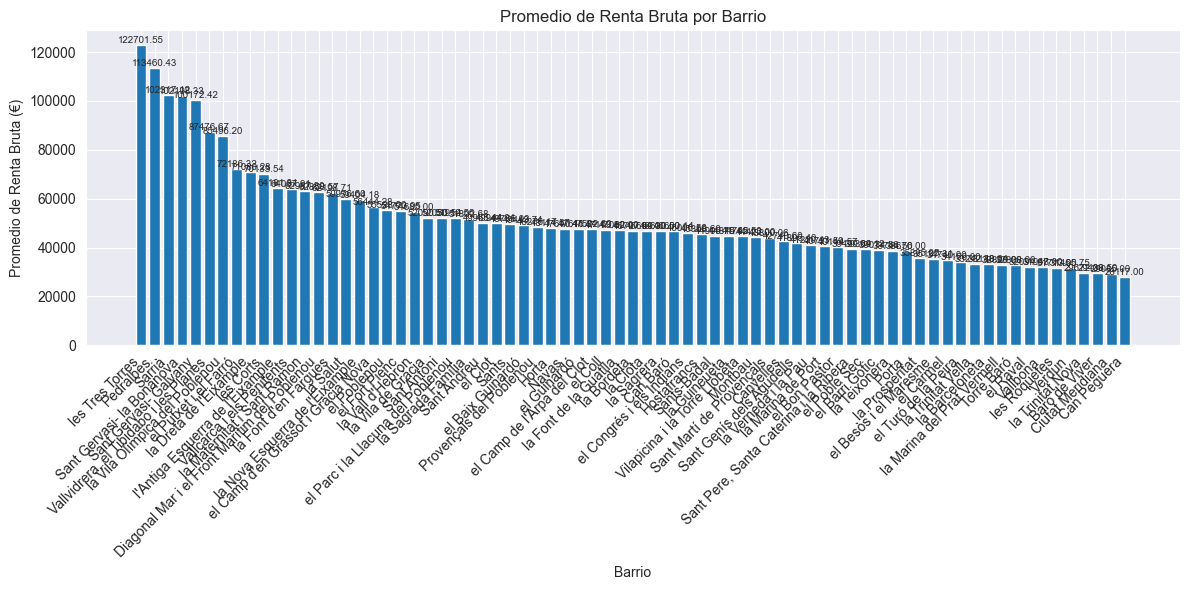

In [64]:
# Convertir la columna de importe a número
df_renta['Import_Renda_Bruta_€'] = pd.to_numeric(df_renta['Import_Renda_Bruta_€'], errors='coerce')

# Calcular el promedio de renta por barrio
renta_promedio_barrio = df_renta.groupby('Nom_Barri')['Import_Renda_Bruta_€'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(renta_promedio_barrio.index, renta_promedio_barrio.values)

# Añadir el valor numérico sobre cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=7)

plt.title('Promedio de Renta Bruta por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Renta Bruta (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()